In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


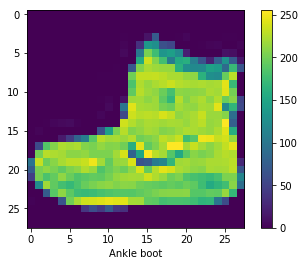

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[0]])
plt.show()

In [6]:
train_images = (train_images / 255.0)
test_images = (test_images / 255.0)

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 10 images from the training set and display the class name below each image.

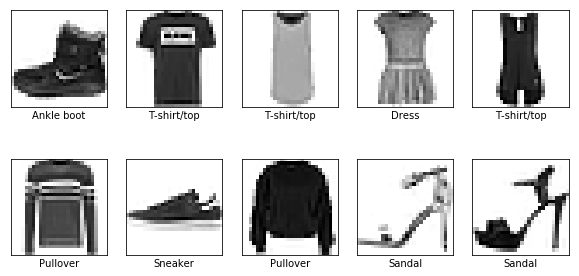

In [7]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [8]:
train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

In [9]:
#Build model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
model = Sequential([Dense(64,activation='relu',input_shape=(784,)),
                   Dense(64,activation='relu'),
                   Dense(64,activation='relu'),
                   Dense(10,activation='softmax'),])

Using TensorFlow backend.


In [10]:
#Compile Model
model.compile( optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],)

In [11]:
#Train model
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=64,
)

Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.5359 - accuracy: 0.8108
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3888 - accuracy: 0.8578
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.3474 - accuracy: 0.8749
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.3258 - accuracy: 0.8809
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3096 - accuracy: 0.8871
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2943 - accuracy: 0.8906
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2818 - accuracy: 0.8955
Epoch 8/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2718 - accuracy: 0.8984
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2637 - accuracy: 0.9002
Epoch 10/10
60000/60000 [=====================

In [12]:
test_loss, test_acc = model.evaluate(test_images,to_categorical(test_labels))
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 79us/step

Test accuracy: 0.876800000667572


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.